<a href="https://colab.research.google.com/github/estebanhernandezr/AWEN/blob/master/SantiagoEsteban_AlvarezHernandez_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

La dos celdas a continuación deben ejecutarse antes de realizar los **imports** para actualizar la versión de **pandas**.

In [2]:
pip install --upgrade xlrd 

     |████████████████████████████████| 96 kB 2.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 1.5 MB/s 


In [97]:
#Para la visualizion y manipulacion de los datos 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm

#Funcionamiento asociado al Aprendizaje de Máquina No Supervisado 
from sklearn_extra.cluster import KMedoids
from sklearn.utils import shuffle
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples, silhouette_score

# **Importación y Preprocesamiento de los datos**

Especificamos las **rutas** de los archivos para importarlos a **python**.

In [5]:
data_ratings_path = '/content/u_data_ratings.xls'
movies_genre_path = '/content/u_movies_genre.xls'
movies_items_path = '/content/u_movies_items.xls'
occupations_path  = '/content/u_occupation.xls'
user_info_path    = '/content/u_user_info.xls'

A continuación, importamos los archivos excel a python. Además de importar los archivos excel que contienen la inforamción, limpiamos y preprocesamos los datos para facilitar su entendimiento.

In [6]:
#Importación del archivo u_data_ratings.xls 
data_ratings = pd.read_excel(data_ratings_path, names=['User ID', 'Movie ID', 'Ratings', 'Timestamp'])
data_ratings.drop(columns=['Timestamp'], inplace=True)

#Importación del archivo u_movies_genre.xls 
movies_genre = pd.read_excel(movies_genre_path,header=None, names=['Genre', 'Genre ID'])

#Importación y limpieza del archivo u_movies_items.xls 
movies_items = pd.read_excel(movies_items_path,header=None, names=["Movie ID", "Movie Title", "Release Date", "Video Release Date", "IMDb URL", "Unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"])
movies_items.drop(columns=['Video Release Date','IMDb URL','Release Date'], inplace=True)
movies_items.dropna(inplace=True)

#Importación del archivo u_occupation.xls
occupations = pd.read_excel(occupations_path,header=None, names=["Occupation"])

#Importación del archivo u_user_info.xls
user_info  = pd.read_excel(user_info_path,header=None, names=["User ID", "Age", "Gender", "Occupation", "Zip Code"])

La limpieza de los archivos consistió en eliminar ciertas caracteristicas debido a que o no tienen inforamción o consideramos que no son relevantes para el desarrollo del proyecto. Habiendo hecho las respectivas importaciones y limpiezas de los datos, obtenemos las 5 tablas.

In [7]:
data_ratings.head()

,User ID,Movie ID,Ratings
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [8]:
movies_genre.head()

,Genre,Genre ID
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [9]:
movies_items.head(-1)

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1677,Sweet Nothing (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
movies_items.loc[movies_items["Movie Title"] == "Heavy Metal (1981)"]

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
100,101,Heavy Metal (1981),0,1,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [11]:
occupations.head()

,Occupation
0,administrator
1,artist
2,doctor
3,educator
4,engineer


In [12]:
user_info.head(-1)

,User ID,Age,Gender,Occupation,Zip Code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,2215
940,941,20,M,student,97229


A continaución analizaremos un poco la inforamción presente en las tablas para conseguir conocimeinto de dicha inforamción y poder hacer inferencia sobre los datos.

In [13]:
data_ratings["Ratings"].describe()

count    65535.000000
mean         3.533883
std          1.130528
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: Ratings, dtype: float64

In [14]:
movies_items.iloc[:, 2:].apply(pd.Series.value_counts).drop([0], axis=0)

,Unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,2,251,135,42,122,505,109,50,725,22,24,92,56,61,247,101,251,71,27


In [15]:
user_info["Age"].describe()

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: Age, dtype: float64

In [16]:
user_info["Occupation"].value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: Occupation, dtype: int64

In [17]:
user_info["Gender"].value_counts()

M    670
F    273
Name: Gender, dtype: int64

Con esto en cuenta podemos concluir lo siguiente:

- Con respecto a los ratings, aunque sea de 0 a 5, el valor minimo es 1 mientras que el máximo es 5. Adicionalmente se puede vere que el puntaje promedio es 3.5.
- De los 18 géneros, los top 3 son
  1. Drama con 725
  2. Comedia con 505
  3. Accion y Thriller con 251
- De los 18 géneros, omitiendo el género desconocido, Fantasía es el género con menos peliculas con solo 22.
- De los usuarios, la edad promedio es 34, la edad mínima es 7 y la máxima es 73. También se tiene que la mayoria de los usuarios son estudiantes y 71% de los usuarios son hombres.

## **mini modelo relacional**

A continuación, ensamblamos un **modelo relacional de bases de datos** vinculado por medio de las columnas *User ID* y *Movie ID*. 

Muy brevemente, un **modelo relacional de base de datos** es un conjunto de tablas separadas (con diferentes atributos -columnas-) que se vinculan entre sí por medio de una columna (atributo) en común. Algunas de estas tablas pueden vincular entre sí a múltiples tablas diferentes: a este tipo particular de tablas se le conoce como **relación**.

Lo que hacemos a continuación es considerar que las tablas **user_info** y **movies_items** están vinculadas por medio de la relación **data_ratings**: **user_info** y **data_ratings** comparten la columna *User ID* en común; **data_ratings** y **movies_items** comparten la columna *Movie ID* en común.

El objetivo de esto es relacionar los atributos propios de la tabla **user_info** con aquellos propios de la tabla **movies_items**, por ejemplo, las tuplas: *(Occupation, Movie Genre)*, *(User Gender, Movie Genre)*, *(Age, Movie Genre)*, entre otras, que no se relacionan directamente, pero que, por medio de *User ID* y *Movie ID* se relacionan en **data_ratings**.

Ahora bien, en principio, tenemos cinco tablas de datos separadas:
1.   **movies_genre**
2.   **movies_items**
3.   **data_ratings**
4.   **user_info**
5.   **occupations**

Sin embargo, algunas de ellas se encuentran implícitas dentro de otras: para ser más especifico, **occupations** $\subseteq$ **user_info**, mientras que **movies_genre** $\subseteq$ **movies_items**. No en vano, la tabla contenida se puede obtener (deducir) perfectamente de la tabla contenedora. Este embebimiento de tablas posibilita ignorar, por ahora, aquellas tablas embebidas.

Así que, nos quedamos solo con las siguientes tablas:
1.   **movies_items**
2.   **data_ratings**
3.   **user_info**

Sobre la cuales vamos a aplicar el modelo relacional de bases de datos, como lo mencionamos arriba.




A continuación, explicitamos el embebimiento de la tabla **movies_genre** dentro de la tabla **movies_items**: lo que se hace es crear una fila diferente para cada una de las clasificaciones que se le asignó a un película por género. En ese orden de ideas, una fila de película clasificada como de género de "Acción", "Aventura" y "Comedia" se convierte en tres filas diferentes que clasifican a la película como género de "Acción", otra como género de "Aventura" y otra como género de "Comedia". Esto se hace para generar una relación uno a uno (casi que funcional) entre una película y un género. Luego, cuando asignemos a cada *User ID* y *Rating* su respectivo *Movie ID*, implicitamente se le asigna un *Rating* y un *User ID* a cada clasificación (género).

In [18]:
def incorporar_genero_peliculas(genre):
    genre_c = genre.copy()
    
    ACCI = genre_c.loc[genre_c['Action'] == 1].drop(['Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], axis=1)
    ACCI['Genre'] = ACCI['Action'].apply(lambda x: 'Action' if x==1 else 'Undefined')
    ACCI = ACCI.drop(['Action'], axis=1)
    ADVE = genre_c.loc[genre_c['Adventure'] == 1].drop(['Action', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], axis=1)
    ADVE['Genre'] = ADVE['Adventure'].apply(lambda x: 'Adventure' if x==1 else 'Undefined')
    ADVE = ADVE.drop(['Adventure'], axis=1)
    ANIM = genre_c.loc[genre_c['Animation'] == 1].drop(['Adventure', 'Action', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], axis=1)
    ANIM['Genre'] = ANIM['Animation'].apply(lambda x: 'Animation' if x==1 else 'Undefined')
    ANIM = ANIM.drop(['Animation'], axis=1)
    CHIL = genre_c.loc[genre_c["Children's"] == 1].drop(['Adventure', 'Animation', "Action", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], axis=1)
    CHIL['Genre'] = CHIL["Children's"].apply(lambda x: "Children's" if x==1 else 'Undefined')
    CHIL = CHIL.drop(["Children's"], axis=1)
    COME = genre_c.loc[genre_c['Comedy'] == 1].drop(['Adventure', 'Animation', "Children's", 'Action', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], axis=1)
    COME['Genre'] = COME['Comedy'].apply(lambda x: 'Comedy' if x==1 else 'Undefined')
    COME = COME.drop(['Comedy'], axis=1)
    CRIM = genre_c.loc[genre_c['Crime'] == 1].drop(['Adventure', 'Animation', "Children's", 'Comedy', 'Action', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], axis=1)
    CRIM['Genre'] = CRIM['Crime'].apply(lambda x: 'Crime' if x==1 else 'Undefined')
    CRIM = CRIM.drop('Crime', axis=1)
    DOCU = genre_c.loc[genre_c['Documentary'] == 1].drop(['Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Action', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], axis=1)
    DOCU['Genre'] = DOCU['Documentary'].apply(lambda x: 'Documentary' if x==1 else 'Undefined')
    DOCU = DOCU.drop('Documentary', axis=1)
    DRAM = genre_c.loc[genre_c['Drama'] == 1].drop(['Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Action', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], axis=1)
    DRAM['Genre'] = DRAM['Drama'].apply(lambda x: 'Drama' if x==1 else 'Undefined')
    DRAM = DRAM.drop('Drama', axis=1)
    FANT = genre_c.loc[genre_c['Fantasy'] == 1].drop(['Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Action', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], axis=1)
    FANT['Genre'] = FANT['Fantasy'].apply(lambda x: 'Fantasy' if x==1 else 'Undefined')
    FANT = FANT.drop('Fantasy', axis=1)
    NOIR = genre_c.loc[genre_c['Film-Noir'] == 1].drop(['Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Action', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], axis=1)
    NOIR['Genre'] = NOIR['Film-Noir'].apply(lambda x: 'Film-Noir' if x==1 else 'Undefined')
    NOIR = NOIR.drop('Film-Noir', axis=1)
    HORR = genre_c.loc[genre_c['Horror'] == 1].drop(['Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Action', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], axis=1)
    HORR['Genre'] = HORR['Horror'].apply(lambda x: 'Horror' if x==1 else 'Undefined')
    HORR = HORR.drop('Horror', axis=1)
    MUSI = genre_c.loc[genre_c['Musical'] == 1].drop(['Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Action', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], axis=1)
    MUSI['Genre'] = MUSI['Musical'].apply(lambda x: 'Musical' if x==1 else 'Undefined')
    MUSI = MUSI.drop('Musical', axis=1)
    MYST = genre_c.loc[genre_c['Mystery'] == 1].drop(['Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Action', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], axis=1)
    MYST['Genre'] = MYST['Mystery'].apply(lambda x: 'Mystery' if x==1 else 'Undefined')
    MYST = MYST.drop('Mystery', axis=1)
    ROMA = genre_c.loc[genre_c['Romance'] == 1].drop(['Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Action', 'Sci-Fi', 'Thriller', 'War', 'Western'], axis=1)
    ROMA['Genre'] = ROMA['Romance'].apply(lambda x: 'Romance' if x==1 else 'Undefined')
    ROMA = ROMA.drop('Romance', axis=1)
    SCIF = genre_c.loc[genre_c['Sci-Fi'] == 1].drop(['Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Action', 'Thriller', 'War', 'Western'], axis=1)
    SCIF['Genre'] = SCIF['Sci-Fi'].apply(lambda x: 'Sci-Fi' if x==1 else 'Undefined')
    SCIF = SCIF.drop('Sci-Fi', axis=1)
    THRI = genre_c.loc[genre_c['Thriller'] == 1].drop(['Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Action', 'War', 'Western'], axis=1)
    THRI['Genre'] = THRI['Thriller'].apply(lambda x: 'Thriller' if x==1 else 'Undefined')
    THRI = THRI.drop('Thriller', axis=1)
    WARS = genre_c.loc[genre_c['War'] == 1].drop(['Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Action', 'Western'], axis=1)
    WARS['Genre'] = WARS['War'].apply(lambda x: 'War' if x==1 else 'Undefined')
    WARS = WARS.drop('War', axis=1)
    WEST = genre_c.loc[genre_c['Western'] == 1].drop(['Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Action'], axis=1)
    WEST['Genre'] = WEST['Western'].apply(lambda x: 'Western' if x==1 else 'Undefined')
    WEST = WEST.drop(['Western'], axis=1)

    new_items = pd.concat([ACCI, ADVE, ANIM, CHIL, COME, CRIM, DOCU, DRAM, FANT, NOIR, HORR, MUSI, MYST, ROMA, SCIF, THRI, WARS, WEST])
    #print(new_items)
    return new_items

A continuación, definímos la función que llevara a cabo el **merge** de dos tablas diferentes, *tab1* y *tab2*, respecto a un atributo pivote en común: *pivot*. El resultado de esta operación es una tabla relación que vincula los atributos de la tabla *tab1* con los atributos de la tabla *tab2* por medio del atributo *pivot*.

In [19]:
def fusionar_por_atributo(tab1, tab2, pivot):
    tab1_c = tab1.copy()
    tab2_c = tab2.copy()

    new_tab = pd.merge(tab1, tab2, on=pivot)
    #print(new_tab)
    return new_tab

Finalmente, llevamos a cabo el embebimiento de la tabla **movies_genre** dentro de **movies_items** y en seguida creamos unas tablas relación que van a enlazar las tablas relacionadas con la relación, sin relacionar, aún, las tablas: **data_ratings** $+$ **movies_items**, por medio del atributo *Movie ID*, y **user_info** $+$ **data_ratings** por medio del atributo *User ID*.

Finalmente, relacionamos las tablas **user_info** y **movies_items** por medio de la relación **data_ratings**: **user_info** $+$ (**data_ratings** + **movies_items**), o recíprocamente, **movies_items** $+$ (**data_ratings** $+$ **user_info**).

El resultado de estas relaciones lo observamos más abajo.

In [20]:
new_table = incorporar_genero_peliculas(movies_items)
rating_movie = fusionar_por_atributo(data_ratings, new_table, 'Movie ID')
rating_user = fusionar_por_atributo(data_ratings, user_info, 'User ID')
relation_table1 = fusionar_por_atributo(rating_movie, user_info, 'User ID')
relation_table2 = fusionar_por_atributo(rating_user, new_table, 'Movie ID')

Operación: **movies_genre** $\subseteq$ **movies_items**

Resultado: **new_table** (embebimiento de **movies_genre** dentro de **movies_items**)

In [21]:
# print(new_table)
# print(new_table.shape)
new_table.loc[new_table['Movie ID'] == 101]

,Movie ID,Movie Title,Unknown,Genre
100,101,Heavy Metal (1981),0,Action
100,101,Heavy Metal (1981),0,Adventure
100,101,Heavy Metal (1981),0,Animation
100,101,Heavy Metal (1981),0,Horror
100,101,Heavy Metal (1981),0,Sci-Fi


Operación: **data_rating** $+$ **new_table**

Resultado: **rating_movie** (relación entre **data_ratings** y **movies_items**)

In [22]:
rating_movie

,User ID,Movie ID,Ratings,Movie Title,Unknown,Genre
0,196,242,3,Kolya (1996),0,Comedy
1,63,242,3,Kolya (1996),0,Comedy
2,226,242,5,Kolya (1996),0,Comedy
3,154,242,3,Kolya (1996),0,Comedy
4,306,242,5,Kolya (1996),0,Comedy
...,...,...,...,...,...,...
138720,655,1256,3,"Designated Mourner, The (1997)",0,Drama
138721,463,1606,2,Deceiver (1997),0,Crime
138722,798,1544,3,It Takes Two (1995),0,Comedy
138723,565,1622,4,"Paris, France (1993)",0,Comedy


Operación: **data_rating** + **user_info**

Resultado: **rating_user** (relación entre **data_ratings** y **user_info**)

In [23]:
rating_user

,User ID,Movie ID,Ratings,Age,Gender,Occupation,Zip Code
0,196,242,3,49,M,writer,55105
1,196,393,4,49,M,writer,55105
2,196,381,4,49,M,writer,55105
3,196,251,3,49,M,writer,55105
4,196,655,5,49,M,writer,55105
...,...,...,...,...,...,...,...
65530,919,787,3,25,M,other,14216
65531,921,24,3,20,F,student,98801
65532,910,182,4,28,M,healthcare,29301
65533,910,1012,4,28,M,healthcare,29301


Operación: **user_info** $+$ (**data_rating** $+$ **movies_items**)

Resultado: **relation_table1** (relación entre **user_info** y **movies_items**, por medio del atributo *User ID*)

In [24]:
relation_table1

,User ID,Movie ID,Ratings,Movie Title,Unknown,Genre,Age,Gender,Occupation,Zip Code
0,196,242,3,Kolya (1996),0,Comedy,49,M,writer,55105
1,196,257,2,Men in Black (1997),0,Action,49,M,writer,55105
2,196,257,2,Men in Black (1997),0,Adventure,49,M,writer,55105
3,196,257,2,Men in Black (1997),0,Comedy,49,M,writer,55105
4,196,257,2,Men in Black (1997),0,Sci-Fi,49,M,writer,55105
...,...,...,...,...,...,...,...,...,...,...
138720,913,99,4,Snow White and the Seven Dwarfs (1937),0,Musical,27,M,student,76201
138721,918,488,3,Sunset Blvd. (1950),0,Film-Noir,40,M,scientist,70116
138722,921,24,3,Rumble in the Bronx (1995),0,Action,20,F,student,98801
138723,921,24,3,Rumble in the Bronx (1995),0,Adventure,20,F,student,98801


Operación: **movies_items** $+$ (**data_rating** $+$ **user_info**)

Resultado: **relation_table2** (relación entre **user_info** y **movies_items**, por medio del atributo *Movie ID*)

In [25]:
relation_table2

,User ID,Movie ID,Ratings,Age,Gender,Occupation,Zip Code,Movie Title,Unknown,Genre
0,196,242,3,49,M,writer,55105,Kolya (1996),0,Comedy
1,6,242,4,42,M,executive,98101,Kolya (1996),0,Comedy
2,234,242,4,60,M,retired,94702,Kolya (1996),0,Comedy
3,63,242,3,31,M,marketing,75240,Kolya (1996),0,Comedy
4,181,242,1,26,M,executive,21218,Kolya (1996),0,Comedy
...,...,...,...,...,...,...,...,...,...,...
138720,782,1652,1,21,F,artist,33205,Temptress Moon (Feng Yue) (1996),0,Romance
138721,798,1544,3,40,F,writer,64131,It Takes Two (1995),0,Comedy
138722,828,1646,4,28,M,librarian,85282,Men With Guns (1997),0,Action
138723,828,1646,4,28,M,librarian,85282,Men With Guns (1997),0,Drama


# **Visualización de los datos**

In [26]:
def plot_stackedbar_chart(dataframe, col1, col2, norm=True):
    frames = []
    for i in pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist():
        row = pd.DataFrame(dataframe.loc[dataframe[col1] == i][col2].value_counts()).T
        frames.append(row)
    
    df = pd.concat(frames)
    print(pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist())
    df = df.set_index([pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist()])
    
    if norm:
        df = df.div(df.sum(axis=1), axis=0)

    print(df)

    df.plot(
        kind = 'barh',
        stacked = True,
        title = 'Stacked Bar Graph',
        mark_right = True)

In [59]:
def plot_mean_chart(dataframe, col1, col2):
    frames = []
    for i in pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist():
        row = pd.DataFrame(dataframe.loc[dataframe[col1] == i][col2].value_counts()).T
        row1 = row.mul(row.columns, fill_value=0)
        row1 = pd.DataFrame(row1.sum(axis = 1)/row.sum(axis = 1))
        frames.append(row1)

    df = pd.concat(frames)
    df = df.set_index([pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist()])

    #df.plot(kind = 'barh', title = 'Stacked Bar Graph', mark_right = True)

    return df

In [106]:
plot_mean_chart(relation_table2, 'Movie Title', 'Ratings')

,0
Star Wars (1977),4.331606
Return of the Jedi (1983),4.003067
"Empire Strikes Back, The (1980)",4.139738
Fargo (1996),4.192771
"English Patient, The (1996)",3.692557
...,...
"Beans of Egypt, Maine, The (1994)",3.000000
Johns (1996),3.000000
"Low Life, The (1994)",1.000000
S.F.W. (1994),2.000000


In [109]:
plot_mean_chart(relation_table2, 'Movie Title', 'Age')

,0
Star Wars (1977),33.303109
Return of the Jedi (1983),33.082822
"Empire Strikes Back, The (1980)",32.419214
Fargo (1996),34.087349
"English Patient, The (1996)",36.873786
...,...
"Beans of Egypt, Maine, The (1994)",25.000000
Johns (1996),25.000000
"Low Life, The (1994)",26.000000
S.F.W. (1994),21.000000


In [118]:
plot_mean_chart(relation_table2.loc[relation_table2['Movie Title']=='Star Wars (1977)'], 'Age', 'Ratings')

,0
24,4.611111
26,4.166667
27,4.388889
25,4.333333
28,4.785714
30,4.357143
22,3.928571
29,4.357143
33,4.250000
19,4.363636


In [61]:
plot_mean_chart(relation_table2.loc[relation_table2['User ID']==1], 'Genre', 'Ratings')

,0
Drama,3.888889
Comedy,3.453333
Action,3.362319
Thriller,3.565217
Sci-Fi,3.923077
Adventure,3.000000
Romance,3.833333
War,3.625000
Crime,3.590909
Children's,2.095238


['M']
     4    5    3   1   2
M  161  133  111  56  50
['M']
          4         5         3         1         2
M  0.315068  0.260274  0.217221  0.109589  0.097847


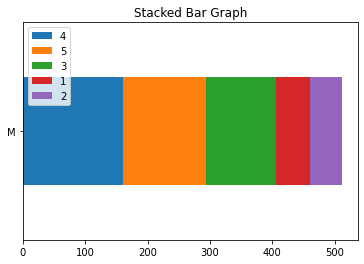

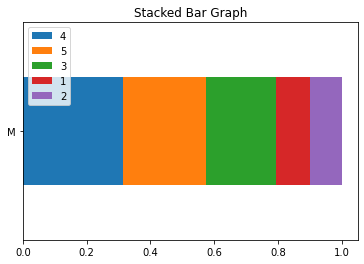

In [33]:
plot_stackedbar_chart(relation_table2.loc[relation_table2["User ID"] == 1], 'Gender', 'Ratings', norm=False)
plot_stackedbar_chart(relation_table2.loc[relation_table2["User ID"] == 1], 'Gender', 'Ratings', norm=True)

[4, 3, 5, 2, 1]
       M      F
4  36297  11173
3  28282   8900
5  22215   8386
2  11676   3536
1   5674   2586
[4, 3, 5, 2, 1]
          M         F
4  0.764630  0.235370
3  0.760637  0.239363
5  0.725957  0.274043
2  0.767552  0.232448
1  0.686925  0.313075


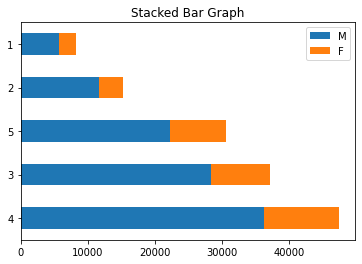

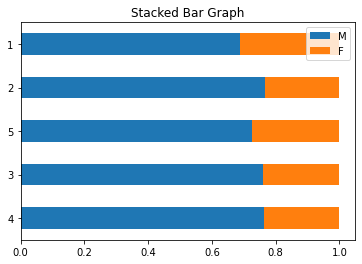

In [34]:
plot_stackedbar_chart(relation_table2, 'Ratings', 'Gender', norm=False)
plot_stackedbar_chart(relation_table2, 'Ratings', 'Gender', norm=True)

['student', 'educator', 'other', 'engineer', 'programmer', 'administrator', 'writer', 'librarian', 'technician', 'executive', 'healthcare', 'entertainment', 'artist', 'scientist', 'marketing', 'retired', 'lawyer', 'none', 'salesman', 'doctor', 'homemaker']
                  1     2     3      4     5
student        1664  3552  8171  10599  6558
educator        659  1131  3352   4849  3311
other           768  1393  3804   4142  2956
engineer        515  1337  3532   3806  2513
programmer      608  1246  2818   4120  2684
administrator   505  1083  2919   3789  2813
writer          634  1027  1888   2146  1483
librarian       330   763  2055   2657  1338
technician      204   502  1274   1912   905
executive       639   496   982   1522  1072
healthcare      776   532   995    918   407
entertainment   260   428   895   1024   765
artist          166   269   679    931   900
scientist        74   280   821   1061   518
marketing        86   396   872    885   512
retired          62   2

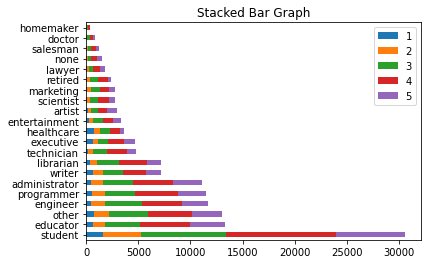

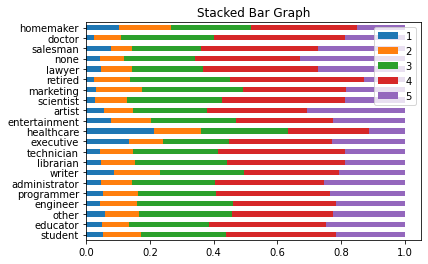

In [35]:
plot_stackedbar_chart(relation_table2, 'Occupation', 'Ratings', norm=False)
plot_stackedbar_chart(relation_table2, 'Occupation', 'Ratings', norm=True)

['Drama', 'Comedy', 'Action', 'Thriller', 'Romance', 'Adventure', 'Sci-Fi', 'War', 'Crime', "Children's", 'Horror', 'Mystery', 'Musical', 'Animation', 'Western', 'Film-Noir', 'Fantasy', 'Documentary']
                1     2     3     4     5
Drama        1220  2321  6431  9648  6643
Comedy       1528  2481  5688  6430  3443
Action       1027  2027  4739  5388  3328
Thriller      852  1675  3993  4972  2828
Romance       649  1282  3243  4529  3007
Adventure     551  1056  2540  2788  1905
Sci-Fi        490   951  2129  2731  1943
War           241   471  1292  2148  1905
Crime         274   518  1331  1853  1307
Children's    397   619  1425  1417   817
Horror        354   517   959  1097   605
Mystery       174   346   830  1273   764
Musical       177   366   913  1074   701
Animation     129   257   651   782   523
Western        47   105   371   439   264
Film-Noir      32    54   238   441   351
Fantasy        74   126   300   261   116
Documentary    44    40   109   199   151
[

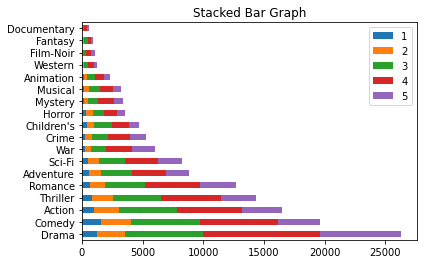

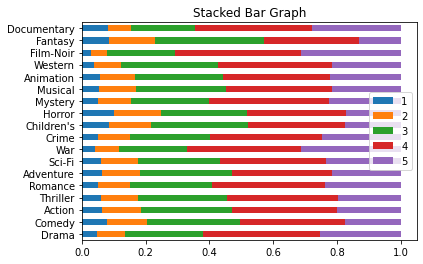

In [36]:
plot_stackedbar_chart(relation_table2, 'Genre', 'Ratings', norm=False)
plot_stackedbar_chart(relation_table2, 'Genre', 'Ratings', norm=True)

['Star Wars (1977)', 'Return of the Jedi (1983)', 'Empire Strikes Back, The (1980)', 'Fargo (1996)', 'English Patient, The (1996)', 'Toy Story (1995)', 'E.T. the Extra-Terrestrial (1982)', 'Alien (1979)', 'Princess Bride, The (1987)', 'Godfather, The (1972)', 'Independence Day (ID4) (1996)', 'Men in Black (1997)', 'Rock, The (1996)', 'Conspiracy Theory (1997)', 'Star Trek: First Contact (1996)', 'Aliens (1986)', 'Wizard of Oz, The (1939)', 'L.A. Confidential (1997)', 'Titanic (1997)', 'Contact (1997)', 'Mission: Impossible (1996)', 'Scream (1996)', 'Saint, The (1997)', '2001: A Space Odyssey (1968)', 'Willy Wonka and the Chocolate Factory (1971)', 'Forrest Gump (1994)', 'Braveheart (1995)', 'Terminator, The (1984)', "Devil's Own, The (1997)", 'Batman (1989)', 'Twister (1996)', 'True Lies (1994)', 'Pulp Fiction (1994)', 'Mars Attacks! (1996)', 'Silence of the Lambs, The (1991)', 'Air Force One (1997)', 'Twelve Monkeys (1995)', 'Blues Brothers, The (1980)', 'Dances with Wolves (1990)', '

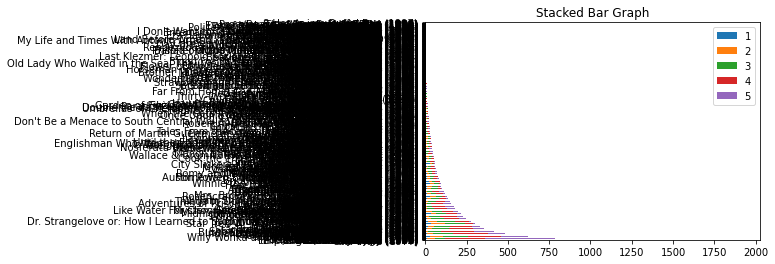

In [37]:
plot_stackedbar_chart(relation_table2, 'Movie Title', 'Ratings', norm=False)

In [69]:
def build_means_dataframe(dataframe, col1='User ID'):
    frames = []
    for i in pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist():
        row = plot_mean_chart(relation_table2.loc[relation_table2[col1]==i], 'Genre', 'Ratings').T
        frames.append(row)
    df = pd.concat(frames)
    df = df.set_index([pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist()])
    return df.fillna(0)

In [70]:
build_means_dataframe(relation_table2)

,Drama,Comedy,Action,Romance,Thriller,Children's,Adventure,Horror,Sci-Fi,Crime,War,Animation,Mystery,Musical,Western,Documentary,Fantasy,Film-Noir
405,1.901709,2.000000,1.989474,1.918605,2.095238,1.969697,1.830508,1.811321,2.113636,2.176471,2.206897,1.880000,2.105263,2.947368,2.062500,1.285714,1.750000,1.800000
13,3.531429,3.068750,3.046154,3.382979,2.950495,2.886364,3.096774,1.754098,3.291667,3.000000,3.533333,3.666667,3.034483,3.160000,4.000000,3.545455,3.363636,4.250000
276,3.739437,3.357143,3.305970,3.490566,3.440678,3.628571,3.343284,3.375000,3.552239,3.692308,4.000000,3.954545,3.523810,3.681818,3.000000,3.666667,3.750000,4.200000
303,3.658730,3.427586,3.018018,3.637681,3.223404,3.560000,3.102041,3.538462,3.290909,3.558824,4.086957,3.916667,3.333333,3.909091,3.875000,3.750000,3.285714,4.400000
450,4.065217,3.693878,3.869565,3.948454,3.954545,3.696970,3.750000,3.666667,3.806452,3.961538,4.185185,4.000000,4.000000,3.956522,3.818182,2.500000,3.000000,3.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
921,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
874,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
895,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# **k-means**

In [72]:
prom_genero_usuario = build_means_dataframe(relation_table2)

In [73]:
prom_genero_usuario

,Drama,Comedy,Action,Romance,Thriller,Children's,Adventure,Horror,Sci-Fi,Crime,War,Animation,Mystery,Musical,Western,Documentary,Fantasy,Film-Noir
405,1.901709,2.000000,1.989474,1.918605,2.095238,1.969697,1.830508,1.811321,2.113636,2.176471,2.206897,1.880000,2.105263,2.947368,2.062500,1.285714,1.750000,1.800000
13,3.531429,3.068750,3.046154,3.382979,2.950495,2.886364,3.096774,1.754098,3.291667,3.000000,3.533333,3.666667,3.034483,3.160000,4.000000,3.545455,3.363636,4.250000
276,3.739437,3.357143,3.305970,3.490566,3.440678,3.628571,3.343284,3.375000,3.552239,3.692308,4.000000,3.954545,3.523810,3.681818,3.000000,3.666667,3.750000,4.200000
303,3.658730,3.427586,3.018018,3.637681,3.223404,3.560000,3.102041,3.538462,3.290909,3.558824,4.086957,3.916667,3.333333,3.909091,3.875000,3.750000,3.285714,4.400000
450,4.065217,3.693878,3.869565,3.948454,3.954545,3.696970,3.750000,3.666667,3.806452,3.961538,4.185185,4.000000,4.000000,3.956522,3.818182,2.500000,3.000000,3.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
921,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
874,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
895,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [89]:
prom_genero_usuario_copy = prom_genero_usuario.copy()
prom_genero_usuario_copy = shuffle(prom_genero_usuario_copy)

kmeans = KMeans(n_clusters=4).fit(prom_genero_usuario_copy)
centroids = kmeans.cluster_centers_
print(centroids)

[[3.69070585 3.36673999 3.37167979 3.61098779 3.58287023 0.94644634
  2.93145212 2.48599639 3.24590068 3.65042996 3.54803511 0.29933665
  3.5092878  1.52831675 0.83772803 0.75041459 0.26865672 2.89809287]
 [3.81265278 3.53278017 3.59892391 3.72533293 3.65221735 3.52092423
  3.64372834 3.34645225 3.65631964 3.70209154 3.91627303 3.41462612
  3.73471354 3.54768768 3.26174164 2.16547995 2.75852281 3.57644926]
 [3.7863073  3.46488516 3.641394   3.7296546  3.4669836  3.49420838
  3.61093049 2.19964407 3.54434217 3.20444216 3.79125456 2.82684333
  2.63859127 2.34305759 0.78493953 0.5406746  1.41990741 0.33994709]
 [3.32003556 2.8440547  2.43036486 2.76324202 2.52017097 0.8738395
  1.47062282 0.98030331 1.81319972 1.65936478 2.0756232  0.51809524
  1.42844848 1.16916006 0.25385274 0.31816699 0.17180365 0.15502283]]


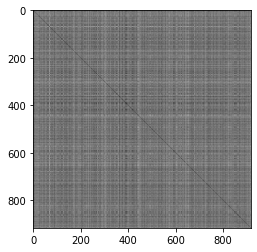

In [90]:
D = pairwise_distances(prom_genero_usuario_copy, prom_genero_usuario_copy, metric='euclidean')
D = D/D.max()
plt.imshow(D,cmap='gray')

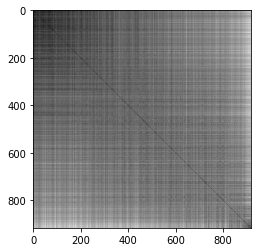

In [91]:
D = pairwise_distances(prom_genero_usuario, prom_genero_usuario, metric='euclidean')
D = D/D.max()
plt.imshow(D,cmap='gray')

Text(0.5, 1.0, 'Elbow plot')

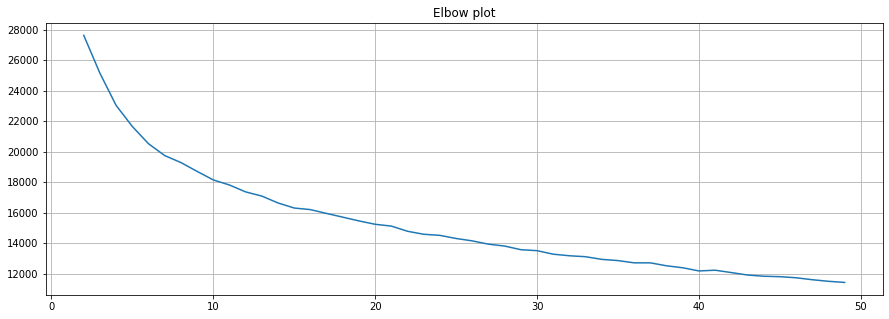

In [95]:
X = prom_genero_usuario
distorsions = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 50), distorsions)
plt.grid(True)
plt.title('Elbow plot')

For n_clusters = 2 The average silhouette_score is : 0.20949508811547024
For n_clusters = 3 The average silhouette_score is : 0.1607909800635699
For n_clusters = 4 The average silhouette_score is : 0.16886673209077127
For n_clusters = 5 The average silhouette_score is : 0.13315577255716263
For n_clusters = 6 The average silhouette_score is : 0.13933150814142914
For n_clusters = 7 The average silhouette_score is : 0.13943434759533968
For n_clusters = 8 The average silhouette_score is : 0.14044662910726088
For n_clusters = 9 The average silhouette_score is : 0.12969827070992396
For n_clusters = 10 The average silhouette_score is : 0.12431903384158122
For n_clusters = 11 The average silhouette_score is : 0.12846731229914798
For n_clusters = 12 The average silhouette_score is : 0.1301205972075103
For n_clusters = 13 The average silhouette_score is : 0.12616839301180358
For n_clusters = 14 The average silhouette_score is : 0.13204653134047203
For n_clusters = 15 The average silhouette_score

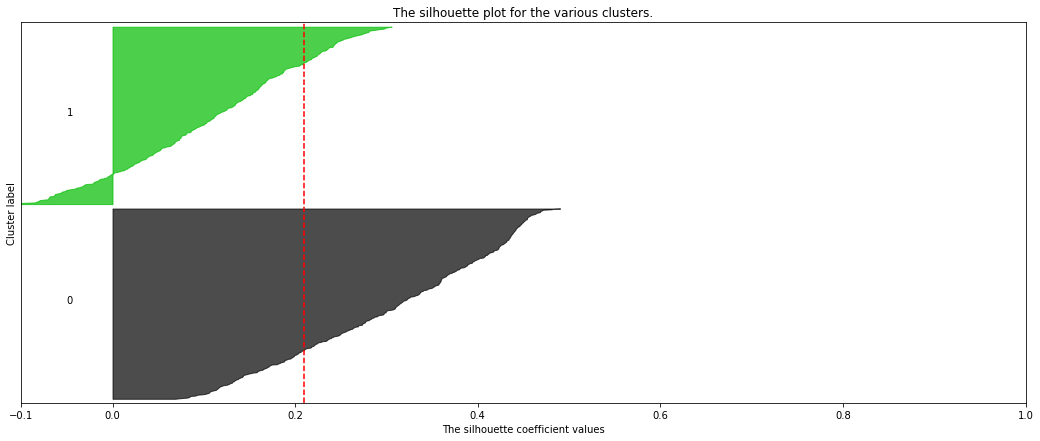

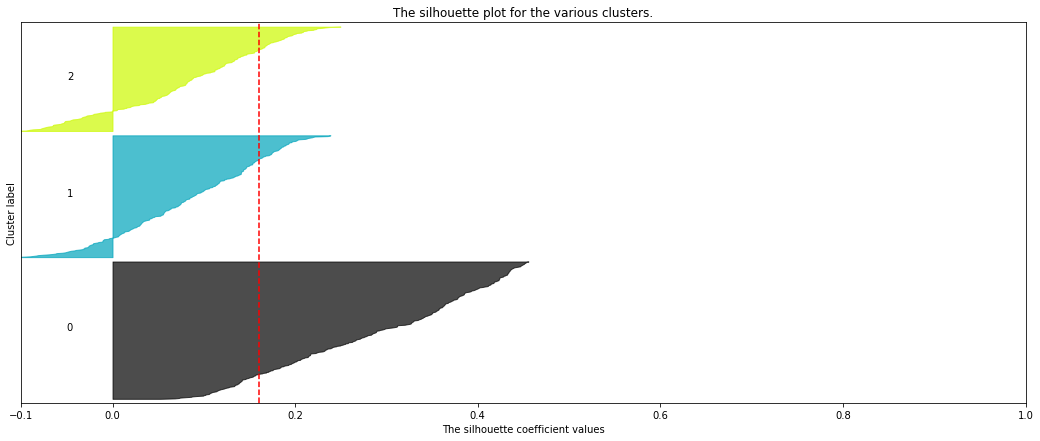

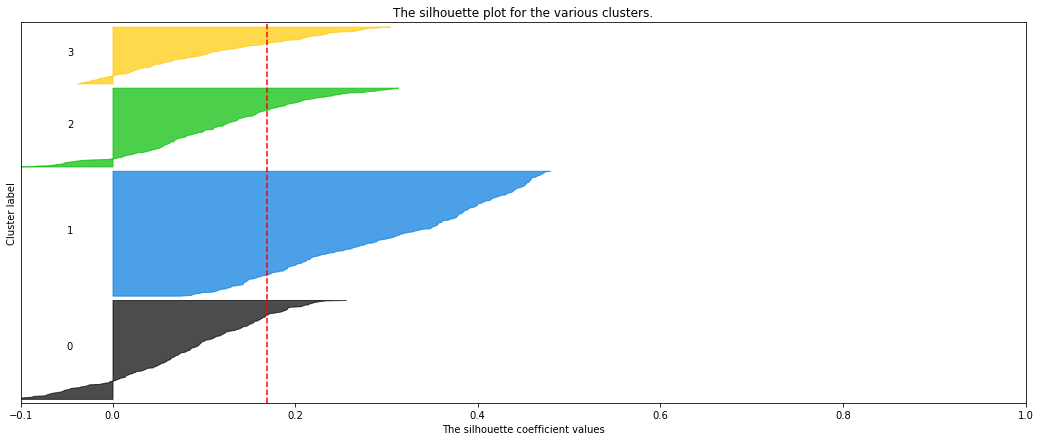

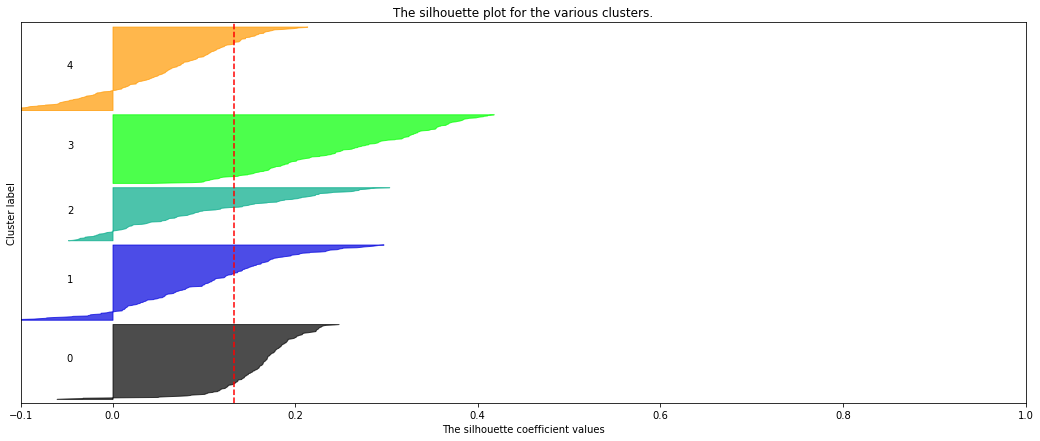

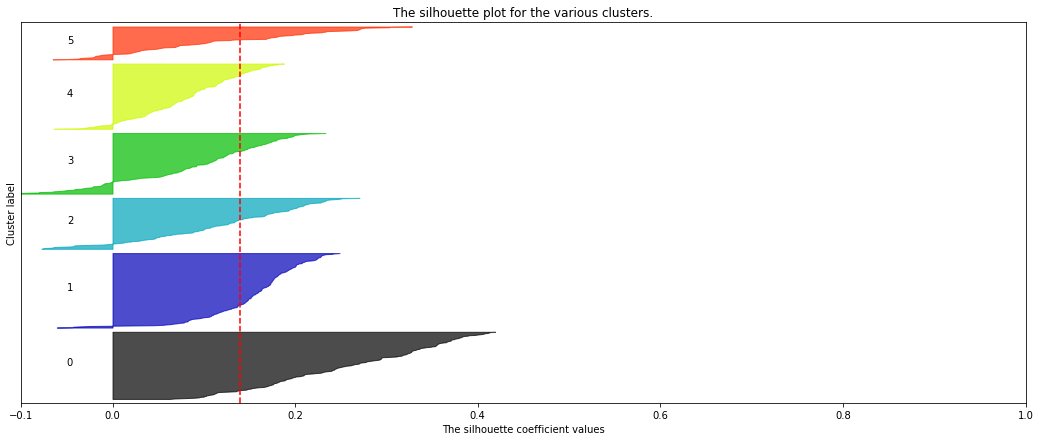

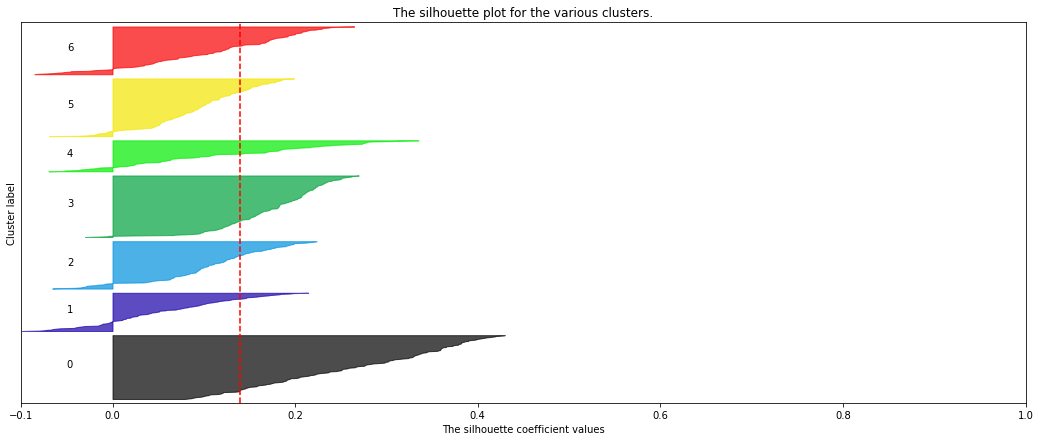

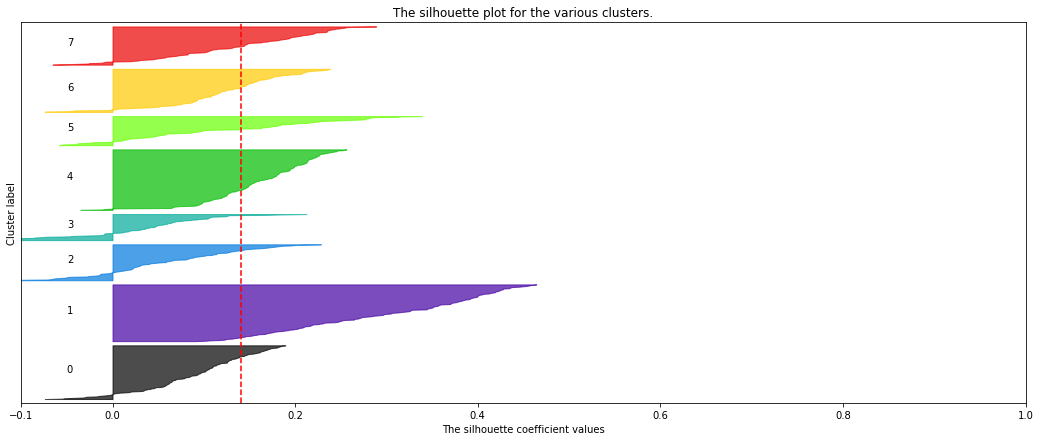

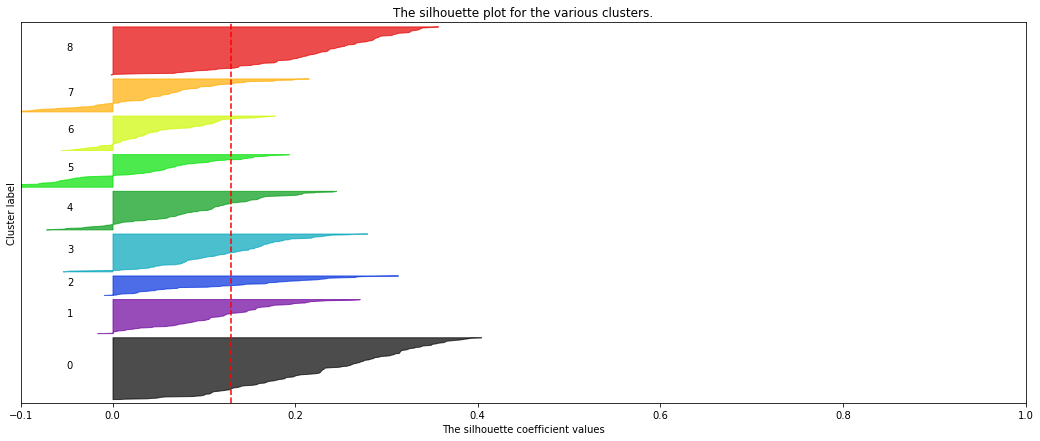

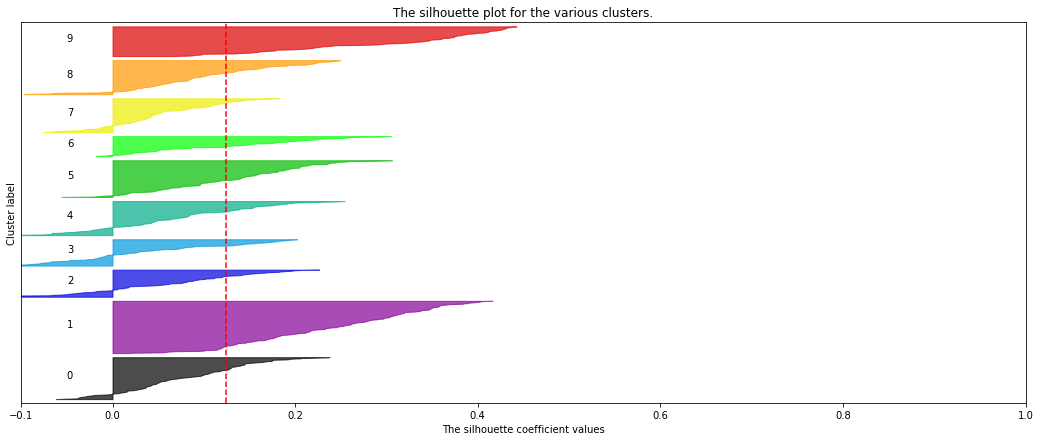

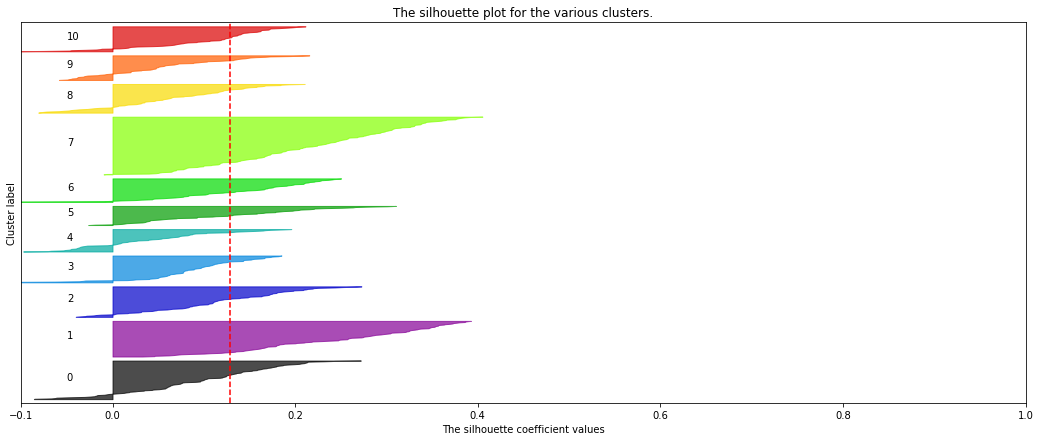

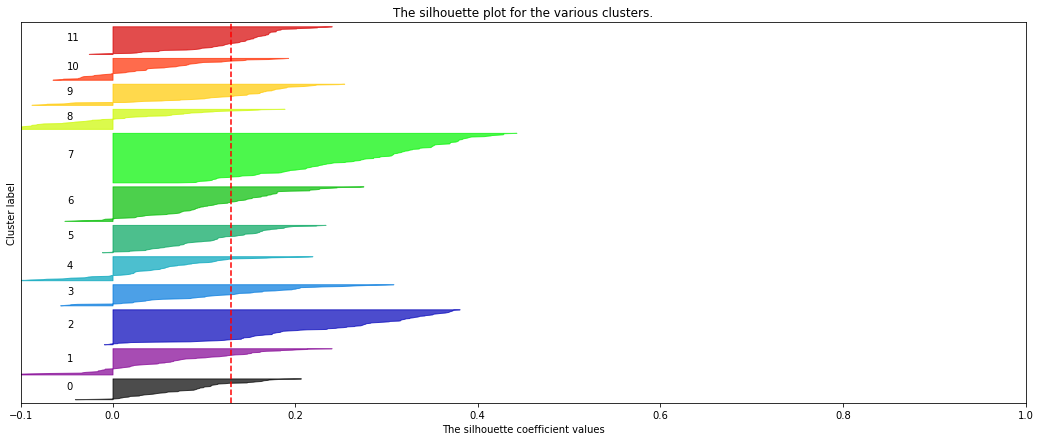

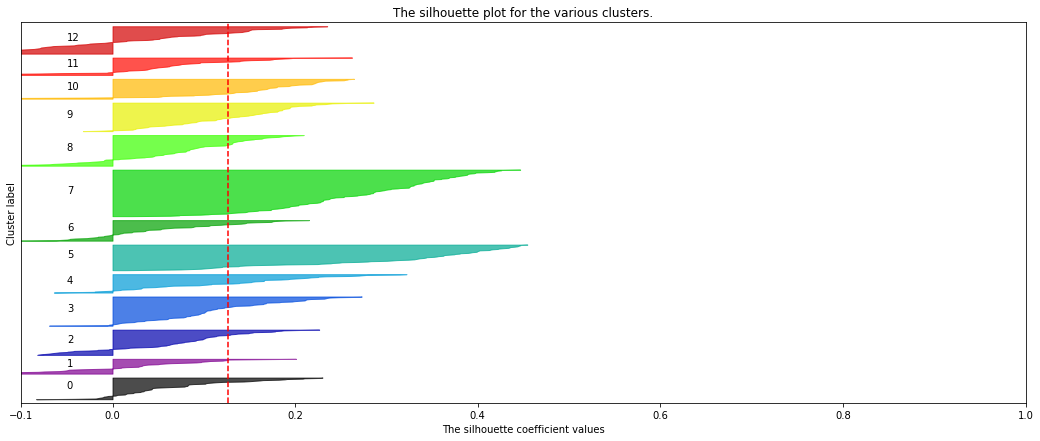

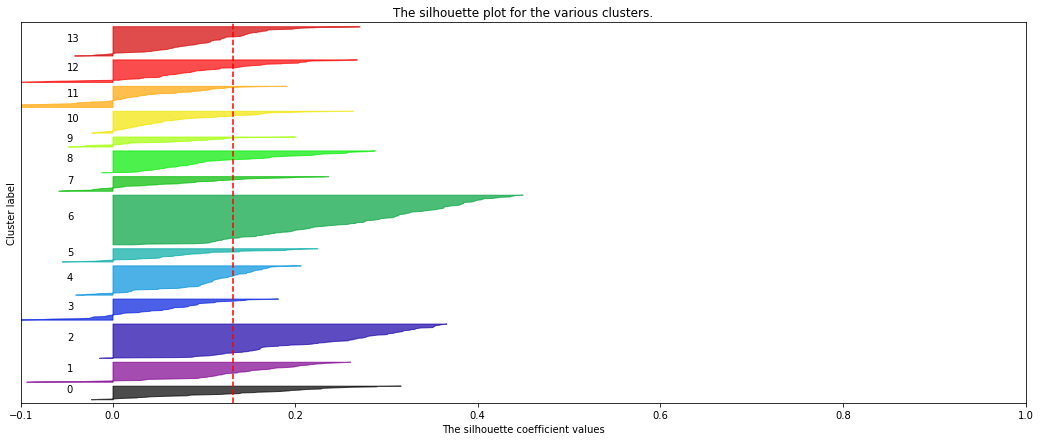

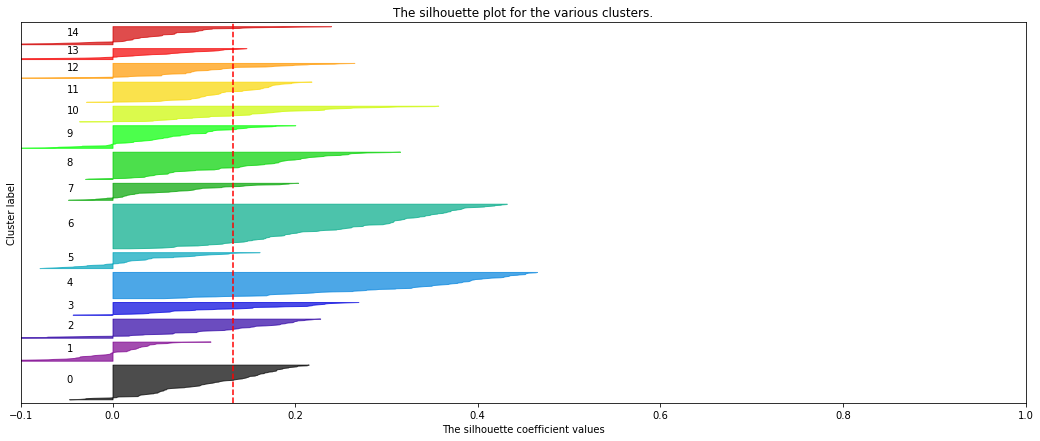

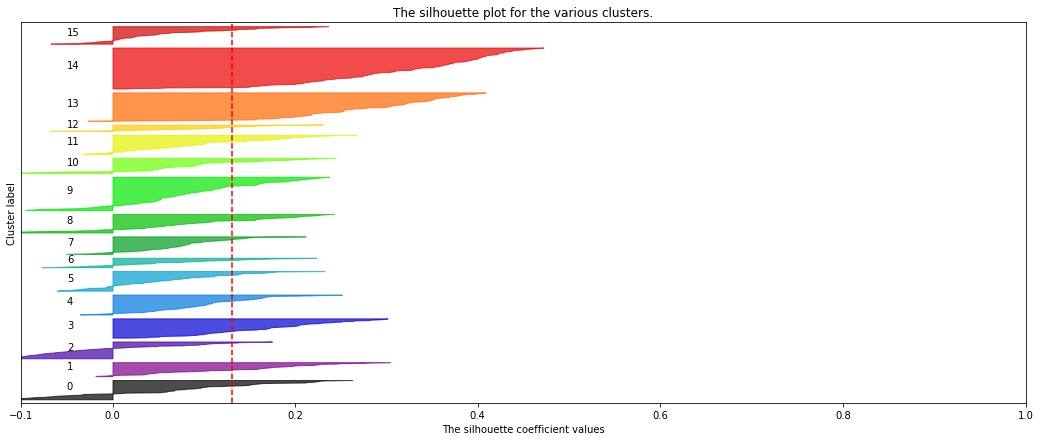

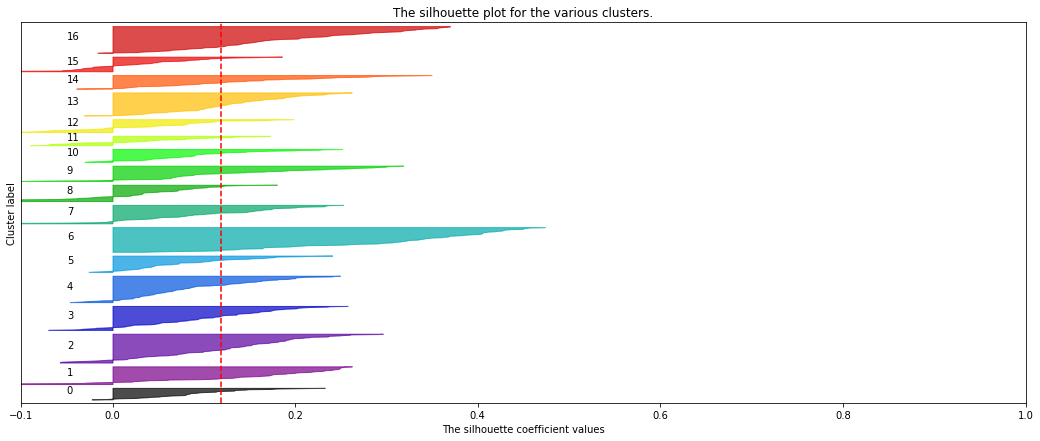

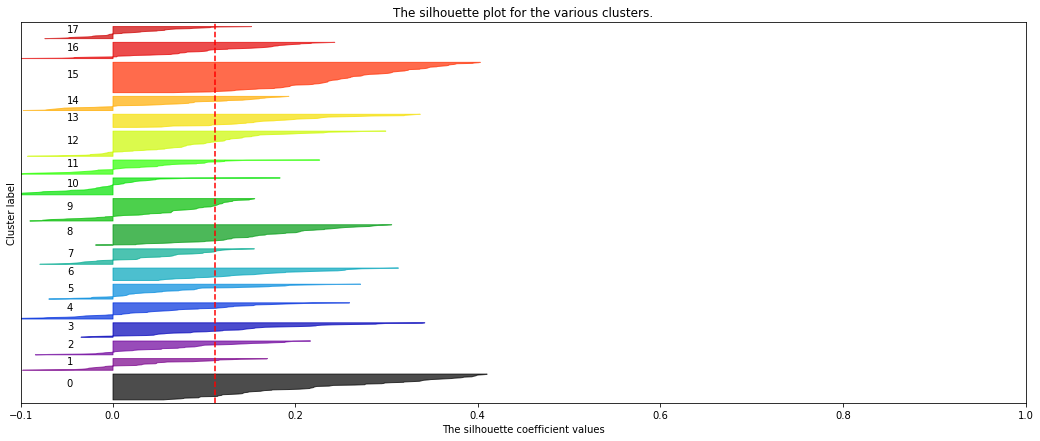

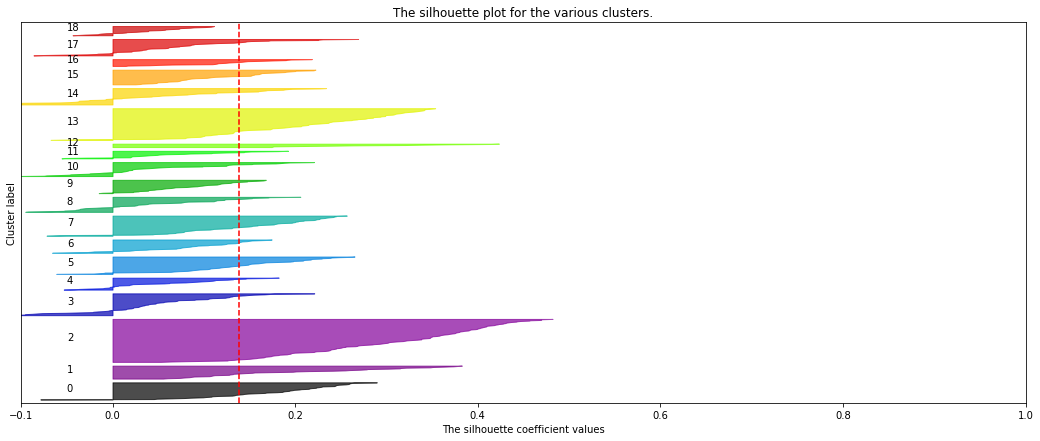

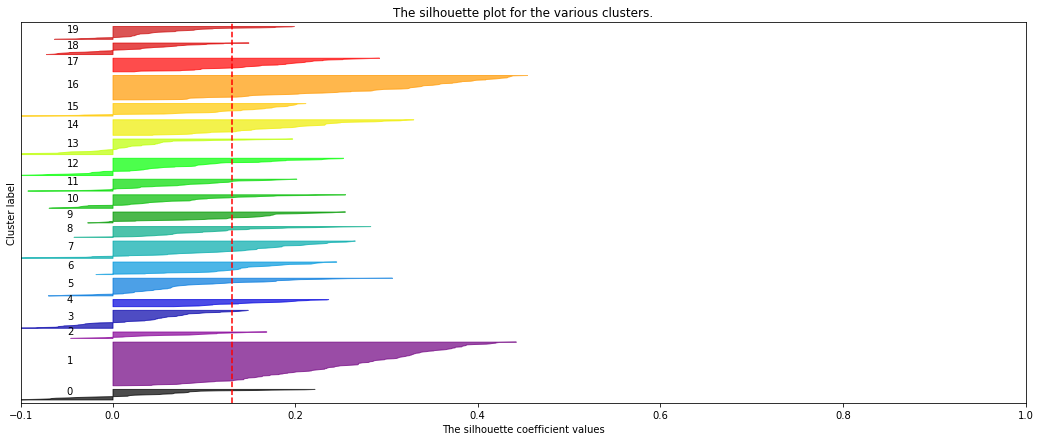

In [104]:
X = prom_genero_usuario_copy.values

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

## **test suite**

                    1         2         3         4         5
Action       0.062208  0.122782  0.287056  0.326367  0.201587
Adventure    0.062330  0.119457  0.287330  0.315385  0.215498
Animation    0.055081  0.109735  0.277968  0.333903  0.223313
Children's   0.084920  0.132406  0.304813  0.303102  0.174759
Comedy       0.078079  0.126776  0.290649  0.328564  0.175933
Crime        0.051864  0.098050  0.251940  0.350748  0.247397
Documentary  0.081031  0.073665  0.200737  0.366483  0.278085
Drama        0.046453  0.088375  0.244869  0.367361  0.252941
Fantasy      0.084379  0.143672  0.342075  0.297605  0.132269
Film-Noir    0.028674  0.048387  0.213262  0.395161  0.314516
Horror       0.100227  0.146376  0.271518  0.310589  0.171291
Musical      0.054782  0.113278  0.282575  0.332405  0.216961
Mystery      0.051373  0.102155  0.245055  0.375849  0.225568
Romance      0.051062  0.100865  0.255153  0.356334  0.236585
Sci-Fi       0.059437  0.115357  0.258248  0.331271  0.235687
Thriller

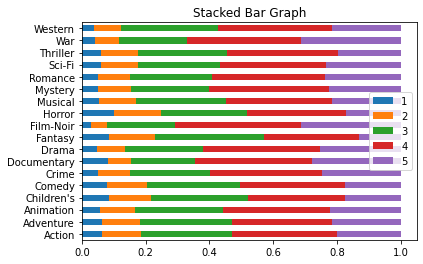

In [38]:
row1 = pd.DataFrame(relation_table2.loc[relation_table2['Genre'] == 'Action']['Ratings'].value_counts()).T
row2 = pd.DataFrame(relation_table2.loc[relation_table2['Genre'] == 'Adventure']['Ratings'].value_counts()).T
row3 = pd.DataFrame(relation_table2.loc[relation_table2['Genre'] == 'Animation']['Ratings'].value_counts()).T
row4 = pd.DataFrame(relation_table2.loc[relation_table2['Genre'] == "Children's"]['Ratings'].value_counts()).T
row5 = pd.DataFrame(relation_table2.loc[relation_table2['Genre'] == 'Comedy']['Ratings'].value_counts()).T
row6 = pd.DataFrame(relation_table2.loc[relation_table2['Genre'] == 'Crime']['Ratings'].value_counts()).T
row7 = pd.DataFrame(relation_table2.loc[relation_table2['Genre'] == 'Documentary']['Ratings'].value_counts()).T
row8 = pd.DataFrame(relation_table2.loc[relation_table2['Genre'] == 'Drama']['Ratings'].value_counts()).T
row9 = pd.DataFrame(relation_table2.loc[relation_table2['Genre'] == 'Fantasy']['Ratings'].value_counts()).T
row10 = pd.DataFrame(relation_table2.loc[relation_table2['Genre'] == 'Film-Noir']['Ratings'].value_counts()).T
row11 = pd.DataFrame(relation_table2.loc[relation_table2['Genre'] == 'Horror']['Ratings'].value_counts()).T
row12 = pd.DataFrame(relation_table2.loc[relation_table2['Genre'] == 'Musical']['Ratings'].value_counts()).T
row13 = pd.DataFrame(relation_table2.loc[relation_table2['Genre'] == 'Mystery']['Ratings'].value_counts()).T
row14 = pd.DataFrame(relation_table2.loc[relation_table2['Genre'] == 'Romance']['Ratings'].value_counts()).T
row15 = pd.DataFrame(relation_table2.loc[relation_table2['Genre'] == 'Sci-Fi']['Ratings'].value_counts()).T
row16 = pd.DataFrame(relation_table2.loc[relation_table2['Genre'] == 'Thriller']['Ratings'].value_counts()).T
row17 = pd.DataFrame(relation_table2.loc[relation_table2['Genre'] == 'War']['Ratings'].value_counts()).T
row18 = pd.DataFrame(relation_table2.loc[relation_table2['Genre'] == 'Western']['Ratings'].value_counts()).T

df = pd.concat([row1, row2, row3, row4, row5, row6, row7, row8, row9, row10, row11, row12, row13, row14, row15, row16, row17, row18])
df = df.set_index([pd.Index(['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])])
df = df.div(df.sum(axis=1), axis=0)


print(df)

df.plot(
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)